In [2]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint
from pyts.image import MarkovTransitionField
from pyts.image import RecurrencePlot


import warnings
warnings.filterwarnings('ignore')

In [2]:
europe = pd.read_json("./data/events/events_European_Championship.json")
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(europe)

In [3]:
def pitch():
    #create figure
    fig,ax=plt.subplots(figsize=(7,5))
    
    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,100], color="black")
    plt.plot([0,100],[100,100], color="black")
    plt.plot([100,100],[100,0], color="black")
    plt.plot([100,0],[0,0], color="black")
    plt.plot([50,50],[0,100], color="black")

    #Left Penalty Area
    plt.plot([16.5,16.5],[80,20],color="black")
    plt.plot([0,16.5],[80,80],color="black")
    plt.plot([16.5,0],[20,20],color="black")

    #Right Penalty Area
    plt.plot([83.5,100],[80,80],color="black")
    plt.plot([83.5,83.5],[80,20],color="black")
    plt.plot([83.5,100],[20,20],color="black")

    #Left 6-yard Box
    plt.plot([0,5.5],[65,65],color="black")
    plt.plot([5.5,5.5],[65,35],color="black")
    plt.plot([5.5,0.5],[35,35],color="black")

    #Right 6-yard Box
    plt.plot([100,94.5],[65,65],color="black")
    plt.plot([94.5,94.5],[65,35],color="black")
    plt.plot([94.5,100],[35,35],color="black")

    #Prepare Circles
    centreCircle = Ellipse((50, 50), width=30, height=39, edgecolor="black", facecolor="None", lw=1.8)
    centreSpot = Ellipse((50, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)
    leftPenSpot = Ellipse((11, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)
    rightPenSpot = Ellipse((89, 50), width=1, height=1.5, edgecolor="black", facecolor="black", lw=1.8)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #limit axis
    plt.xlim(0,100)
    plt.ylim(0,100)
    
    ax.annotate("", xy=(25, 5), xytext=(5, 5),
                arrowprops=dict(arrowstyle="->", linewidth=2))
    ax.text(7,7,'Attack',fontsize=20)
#     ax.set_facecolor("green")

    return fig,ax

(<Figure size 504x360 with 1 Axes>, <AxesSubplot:>)

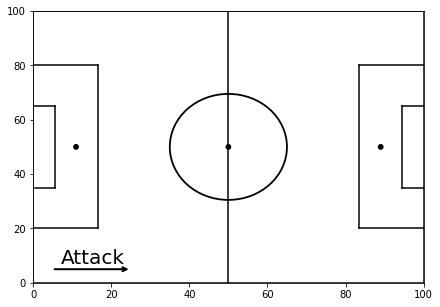

In [4]:
pitch()

In [7]:
europe['eventName'][0]

'Pass'

In [5]:
for index, rows in europe.iterrows():
    if (rows['eventName'] == 'Goalkeeper leaving line'):
        europe = europe.drop(index)
europe.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646


In [6]:
for index, rows in europe.iterrows():
    if (rows['eventName'] == 'Save attempt'):
        europe = europe.drop(index)
europe.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646


In [5]:
europe = europe.loc[europe['teamId'] == 4418]
europe = europe.loc[europe['matchId'] == 1694390]
europe

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646
...,...,...,...,...,...,...,...,...,...,...,...,...
1636,8,Simple pass,[{'id': 1801}],25804,"[{'y': 54, 'x': 65}, {'y': 61, 'x': 55}]",1694390,Pass,4418,2H,2929.417413,85,88180485
1637,8,Simple pass,[{'id': 1801}],7915,"[{'y': 61, 'x': 55}, {'y': 76, 'x': 40}]",1694390,Pass,4418,2H,2933.820746,85,88180487
1638,8,Simple pass,[{'id': 1801}],3276,"[{'y': 76, 'x': 40}, {'y': 90, 'x': 52}]",1694390,Pass,4418,2H,2937.092234,85,88180488
1639,8,Simple pass,[{'id': 1801}],31528,"[{'y': 90, 'x': 52}, {'y': 78, 'x': 63}]",1694390,Pass,4418,2H,2938.609163,85,88180489


In [20]:
firsthalf = europe.loc[europe['matchPeriod'] == '1H']
secondhalf = europe.loc[europe['matchPeriod'] == '2H']

In [28]:
def plot_kde_events_on_field(sample_size=10000):
    
    position_ev = []
    for index, row in passing.iterrows():
        position_ev.append([row['eventName'],row['positions'][0]['x'],row['positions'][0]['y']])
#     print(position_ev)
    
    df_pos_ev = pd.DataFrame(position_ev, columns=['eventName','x','y'])
    
    for event in np.unique(df_pos_ev['eventName']):
        print(event)
        df_pos_event = df_pos_ev[df_pos_ev['eventName'] == event]
        fig,ax = pitch()
        if len(df_pos_event) >= 10000:
            x_y = df_pos_event[['x','y']].sample(sample_size).astype(float)
        else:
            x_y = df_pos_event[['x','y']].astype(float)
        sns.kdeplot(x_y['x'],x_y['y'], cmap = 'Greens', shade = True)
        plt.title(event, fontsize = 30)
        plt.xlim(-1,101)
        plt.ylim(-1,101)
        plt.axis('off')
        fig.tight_layout()
        plt.show()

Pass


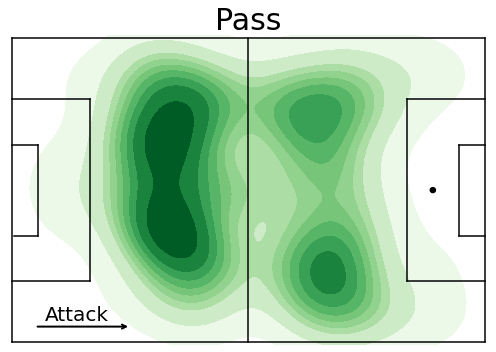

In [29]:
plot_kde_events_on_field()

Duel


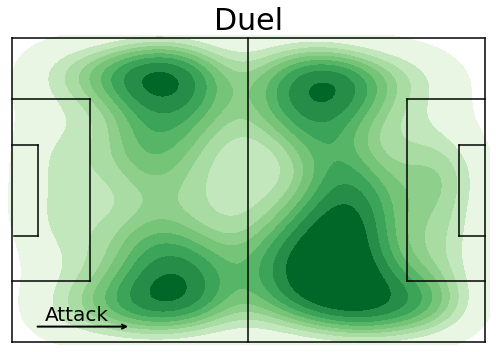

Foul


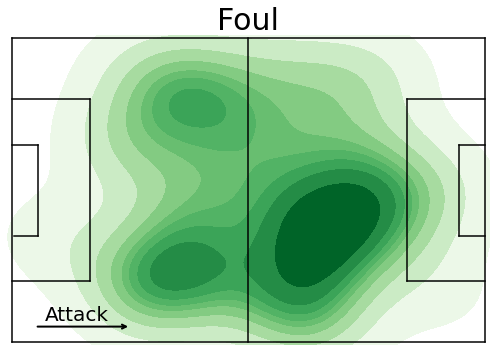

Free Kick


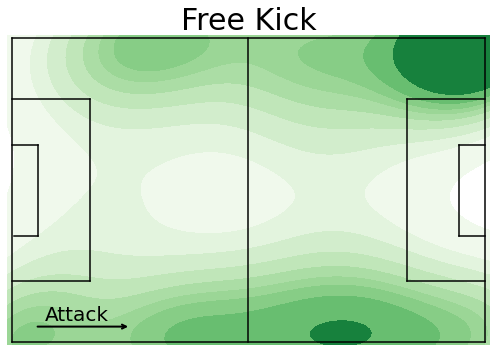

Interruption


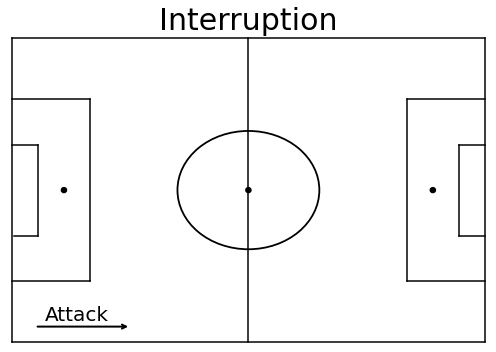

Offside


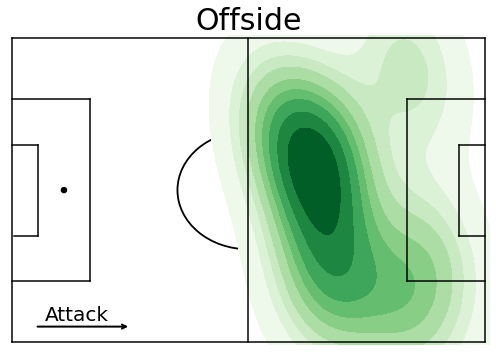

Others on the ball


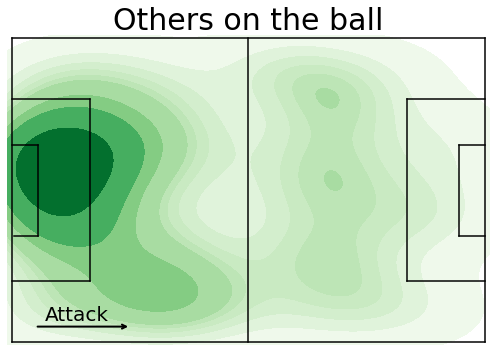

Pass


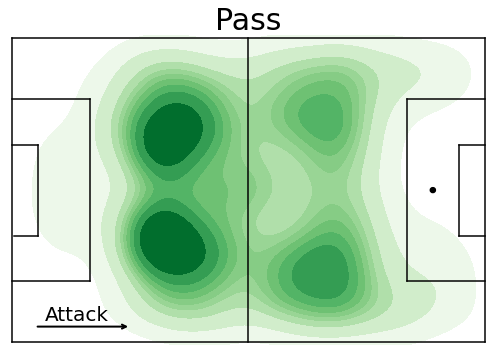

Shot


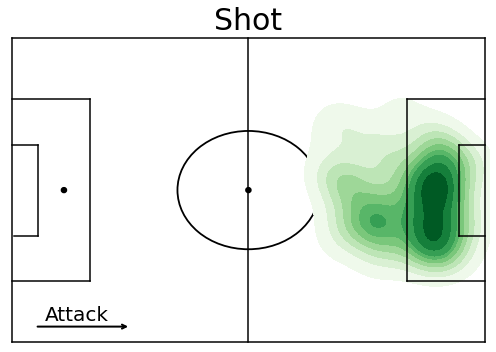

In [26]:
plot_kde_events_on_field()

In [12]:
europe.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646


In [6]:
passing = europe.loc[europe['eventName'] == 'Pass']
duel = europe.loc[europe['eventName'] == 'Duel']
shot = europe.loc[europe['eventName'] == 'Shot']
defence = europe.loc[europe['eventName'] == 'Others on the ball']

In [7]:
passing.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],26010,"[{'y': 48, 'x': 50}, {'y': 50, 'x': 47}]",1694390,Pass,4418,1H,1.255990,85,88178642
1,8,Simple pass,[{'id': 1801}],3682,"[{'y': 50, 'x': 47}, {'y': 48, 'x': 41}]",1694390,Pass,4418,1H,2.351908,85,88178643
2,8,Simple pass,[{'id': 1801}],31528,"[{'y': 48, 'x': 41}, {'y': 35, 'x': 32}]",1694390,Pass,4418,1H,3.241028,85,88178644
3,8,High pass,[{'id': 1802}],7855,"[{'y': 35, 'x': 32}, {'y': 6, 'x': 89}]",1694390,Pass,4418,1H,6.033681,83,88178645
23,8,Head pass,"[{'id': 1401}, {'id': 1802}]",7855,"[{'y': 16, 'x': 34}, {'y': 17, 'x': 39}]",1694390,Pass,4418,1H,81.678003,82,88178657


In [7]:
duel.reset_index(inplace=True)
duel.shape

(260, 13)

In [8]:
a = [1]
count = 2
for i in range(259):
    a.append(count)
    count = count + 1
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [9]:
time = []
for index,row in duel.iterrows():
    if row['eventSec']<2700:
        time.append(row['eventSec'])
    else:
        time.append(row['eventSec'] + 2700)
print(len(time))
print(time)

260
[13.143591000000015, 54.44245000000001, 106.28128400000003, 107.614598, 172.10959400000002, 182.8045400000001, 219.2701750000001, 221.8401550000001, 224.289401, 247.2044350000001, 311.6926000000001, 314.02753699999994, 326.34702300000004, 334.6033379999999, 378.244829, 383.35462299999995, 391.17327, 439.04423799999995, 441.36678600000005, 470.4340360000001, 488.2058400000001, 502.35179100000005, 514.488159, 595.659302, 638.59115, 675.7811650000001, 681.732424, 692.127356, 693.2983959999999, 765.121363, 766.9417109999999, 776.372938, 789.149811, 847.9413790000001, 884.8537819999999, 922.309293, 925.004389, 954.5993960000001, 955.966142, 974.6187970000001, 981.7880540000001, 983.1350359999999, 1011.40274, 1013.6041849999999, 1057.781283, 1059.308398, 1097.394747, 1107.30656, 1132.925437, 1160.744405, 1197.708834, 1214.050624, 1215.797024, 1252.9264130000001, 1254.7808570000002, 1294.662284, 1311.471066, 1385.9686120000001, 1394.848364, 1395.941616, 1399.9195490000002, 1409.8957380000

In [10]:
duel['count'] = a
duel['eventSec'] = time

In [11]:
duel.head()

,index,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,count
0,4,1,Ground defending duel,"[{'id': 702}, {'id': 1801}]",25437,"[{'y': 6, 'x': 89}, {'y': 0, 'x': 85}]",1694390,Duel,4418,1H,13.143591,12,88178646,1
1,15,1,Ground loose ball duel,"[{'id': 701}, {'id': 1802}]",26010,"[{'y': 72, 'x': 54}, {'y': 72, 'x': 56}]",1694390,Duel,4418,1H,54.442450,13,88178653,2
2,32,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",7858,"[{'y': 90, 'x': 23}, {'y': 83, 'x': 33}]",1694390,Duel,4418,1H,106.281284,13,88178660,3
3,33,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",7936,"[{'y': 83, 'x': 33}, {'y': 71, 'x': 32}]",1694390,Duel,4418,1H,107.614598,11,88178661,4
4,45,1,Air duel,"[{'id': 702}, {'id': 1801}]",7936,"[{'y': 86, 'x': 57}, {'y': 100, 'x': 56}]",1694390,Duel,4418,1H,172.109594,10,88178676,5


In [12]:
duel.tail()

,index,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,count
255,1612,1,Air duel,"[{'id': 1901}, {'id': 702}, {'id': 1801}]",231139,"[{'y': 44, 'x': 30}, {'y': 61, 'x': 20}]",1694390,Duel,4418,2H,5563.035682,10,88180453,256
256,1618,1,Air duel,"[{'id': 703}, {'id': 1801}]",7855,"[{'y': 42, 'x': 31}, {'y': 39, 'x': 31}]",1694390,Duel,4418,2H,5584.374433,10,88180463,257
257,1620,1,Ground loose ball duel,"[{'id': 703}, {'id': 1801}]",7915,"[{'y': 17, 'x': 34}, {'y': 10, 'x': 31}]",1694390,Duel,4418,2H,5588.003308,13,88180466,258
258,1624,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",231139,"[{'y': 54, 'x': 68}, {'y': 76, 'x': 74}]",1694390,Duel,4418,2H,5597.496725,11,88180469,259
259,1632,1,Ground attacking duel,"[{'id': 501}, {'id': 703}, {'id': 1801}]",231139,"[{'y': 52, 'x': 70}, {'y': 74, 'x': 69}]",1694390,Duel,4418,2H,5616.819037,11,88180478,260


In [13]:
x = [duel['eventSec'], duel['count']]
y = duel['count']

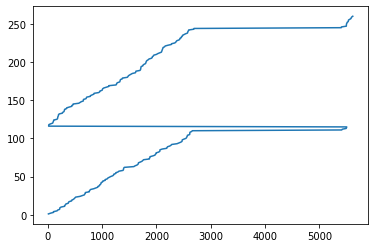

In [17]:
plt.plot(x,y)

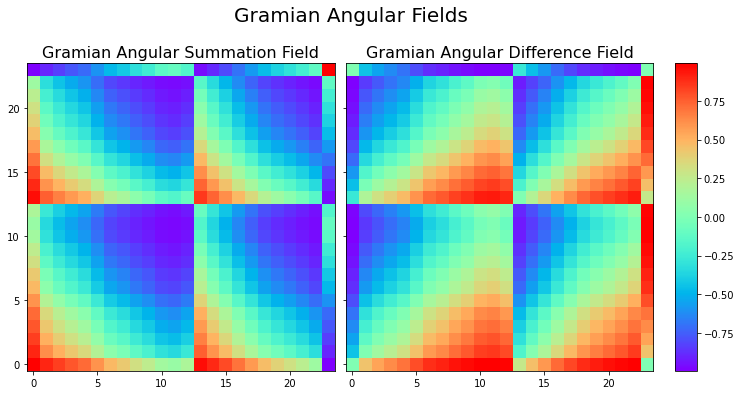

In [21]:
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(x)

gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(x)

fig = plt.figure(figsize=(12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Gramian Angular Summation Field',
          'Gramian Angular Difference Field']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

plt.suptitle('Gramian Angular Fields', y=0.92, fontsize=20)
plt.show()

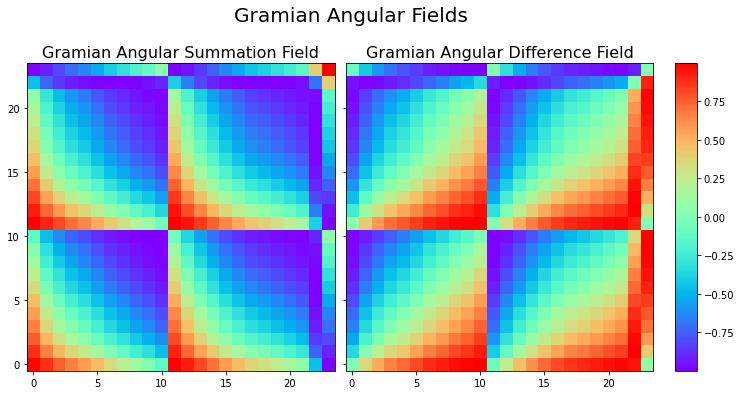

In [36]:
gasf = GramianAngularField(image_size=24, method='summation')
X_gasf = gasf.fit_transform(x)

gadf = GramianAngularField(image_size=24, method='difference')
X_gadf = gadf.fit_transform(x)

fig = plt.figure(figsize=(12, 7))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(1, 2),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
images = [X_gasf[0], X_gadf[0]]
titles = ['Gramian Angular Summation Field',
          'Gramian Angular Difference Field']
for image, title, ax in zip(images, titles, grid):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

plt.suptitle('Gramian Angular Fields', y=0.92, fontsize=20)
plt.show()

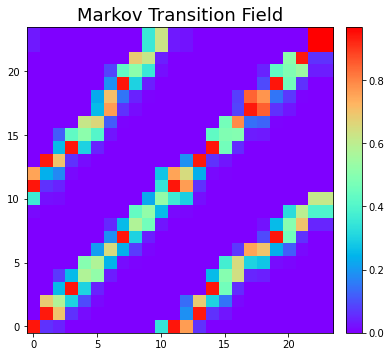

In [17]:
mtf = MarkovTransitionField(image_size=24)
X_mtf = mtf.fit_transform(x)

# Show the image for the first time series
plt.figure(figsize=(6, 6))
plt.imshow(X_mtf[0], cmap='rainbow', origin='lower')
plt.title('Markov Transition Field', fontsize=18)
plt.colorbar(fraction=0.0457, pad=0.04)
plt.show()

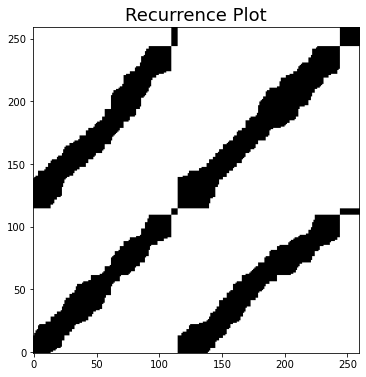

In [19]:
# Recurrence plot transformation
rp = RecurrencePlot(threshold='point', percentage=20)
X_rp = rp.fit_transform(x)

# Show the results for the first time series
plt.figure(figsize=(6, 6))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=18)
plt.show()

In [10]:
duel['count'] = 1
duel = duel.groupby(['playerId']).sum()['count']
duel

playerId
3276       65
3682       96
7855      107
7858      111
7915      138
7936      190
7988       29
25381       1
25397      45
25437     147
25575      63
25714     123
25804      89
26010     149
31528      66
70085       2
134513     22
231139    138
Name: count, dtype: int64

In [11]:
shot['count'] = 1
shot = shot.groupby(['playerId']).sum()['count']
shot

playerId
3682      24
7855       4
7858       1
7936      14
7988       1
25437      4
25575     11
25714     17
25804      8
26010     14
31528      3
134513     3
231139     6
Name: count, dtype: int64

In [12]:
defence['count'] = 1
defence = defence.groupby(['playerId']).sum()['count']
defence

playerId
3276      25
3682      28
7855      40
7858      27
7915      34
7936      35
7988       7
25381     11
25397     10
25437     26
25575      2
25714     28
25804     29
26010     16
31528     15
70085      2
134513     6
231139    15
Name: count, dtype: int64

In [3]:
teams = pd.read_json('data/teams.json')
teams.tail()

,city,name,wyId,officialName,area,type
137,Las Rozas,Spain,1598,Spain,"{'name': 'Spain', 'id': 724, 'alpha3code': 'ES...",national
138,Beograd,Serbia,17322,Serbia,"{'name': 'Serbia', 'id': 688, 'alpha3code': 'S...",national
139,Bern,Switzerland,6697,Switzerland,"{'name': 'Switzerland', 'id': 756, 'alpha3code...",national
140,Warszawa,Poland,13869,Poland,"{'name': 'Poland', 'id': 616, 'alpha3code': 'P...",national
141,Abuja,Nigeria,16823,Nigeria,"{'name': 'Nigeria', 'id': 566, 'alpha3code': '...",national


In [4]:
import os

In [8]:
for index,row in teams.iterrows():
    name = str(row['wyId'])
    path = "data/data/" + name
    if os.path.isdir(path):
        continue
    else:
        os.makedirs(path)
        os.makedirs( path + "/GAF")
        os.makedirs( path + "/MTF")

In [35]:
temp = []

In [31]:
eng = pd.read_json("data/events/events_France.json")
eng.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],253784,"[{'y': 51, 'x': 50}, {'y': 46, 'x': 31}]",2500686,Pass,3799,1H,1.935181,85,176505119
1,8,High pass,[{'id': 1801}],29474,"[{'y': 46, 'x': 31}, {'y': 74, 'x': 68}]",2500686,Pass,3799,1H,3.599295,83,176505121
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",253784,"[{'y': 74, 'x': 68}, {'y': 54, 'x': 72}]",2500686,Duel,3799,1H,6.827043,10,176505122
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",56441,"[{'y': 26, 'x': 32}, {'y': 46, 'x': 28}]",2500686,Duel,3772,1H,6.985577,10,176505017
4,1,Ground attacking duel,"[{'id': 702}, {'id': 1801}]",366760,"[{'y': 54, 'x': 72}, {'y': 55, 'x': 73}]",2500686,Duel,3799,1H,9.511272,11,176505124


In [32]:
eng = eng.teamId.unique()

In [37]:
for i in range(len(eng)):
    temp.append(eng[i])

In [38]:
len(temp)

20